### <font color='red'> Project 2 : Buzz Prediction on Twitter

Project Description:
- There are two different datasets for Regression and Classification tasks. Right-most column in both the datasets is a dependent variable i.e. buzz.
- Data description files are also provided for both the datasets.
- Deciding which dataset is for which task is part of the project.
- Read data into Jupyter notebook, use pandas to import data into a data frame.
- Preprocess data: Explore data, check for missing data and apply data scaling. Justify the type of scaling used.

Regression Task:
- Apply all the regression models you've learned so far. If your model has a scaling parameter(s) use Grid Search to find the best scaling parameter. Use plots and graphs to help you get a better glimpse of the results. 
- Then use cross-validation to find average training and testing score. 
- Your submission should have at least the following regression models: KNN regressor, linear regression, Ridge, Lasso, polynomial regression, SVM both simple and with kernels. 
- Finally, find the best regressor for this dataset and train your model on the entire dataset using the best parameters and predict buzz for the test_set.

Classification Task:
- Decide about a good evaluation strategy and justify your choice.
- Find best parameters for the following classification models: KNN classification, Logistic Regression, Linear Support Vector Machine, Kernelized Support Vector Machine, Decision Tree. 
- Which model gives the best results?

Deliverables:
- Submit IPython notebook. Use markdown to provide inline comments for this project.
- Rename notebook with your group number and submit only one notebook. Before submitting, make sure everything runs as expected. To check that, restart the kernel (in the menubar, select Kernel > Restart) and then run all cells (in the menubar, select Cell > Run All).
- Visualization encouraged.

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- There is a high possibility that your classmate has also faced the same problem and knows the solution. So this is an effort to encourage collaborative learning, reducing mails for frequently asked queries and also making all the information available to everyone.
- Please check existing threads for your query before creating a new one. It goes without saying that do not share your code or complete solutions there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [1]:
import pandas as pd
df = pd.read_table('Twitter.data',sep=',',header=None)

### Change the variable frac to sample data accordingly. Ex. for 10% of data put frac=0.1

In [2]:
#Using 1% data for initial models 
frac = 0.01

In [3]:
df10 = df.sample(frac=frac,random_state=6).reset_index().iloc[:,1:]

In [4]:
df10.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,2,3,5,0,0,3,9,1,1,4,...,1.000000,1.000000,2,3,5,0,0,3,9,1.5
1,57,35,167,137,149,188,224,31,2,95,...,1.031915,1.084821,57,35,167,137,149,188,224,178.0
2,4,0,1,1,1,0,7,2,0,1,...,0.000000,1.000000,4,0,1,1,1,0,7,0.0
3,372,375,1170,1398,1061,953,940,56,87,287,...,1.032495,1.022340,372,376,1170,1400,1062,954,940,424.5
4,1,0,0,1,4,3,1,1,0,0,...,1.000000,1.000000,1,0,0,1,4,3,1,1.0


In [5]:
df10.describe()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
count,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,...,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000,5832.000000
mean,145.738512,139.830418,162.042524,183.672668,206.521948,229.203532,227.774863,72.374486,69.963134,81.368827,...,1.137537,1.141796,146.197874,140.250686,162.468621,184.149348,207.034636,229.736626,228.340878,197.939215
std,489.242246,477.567758,538.459063,574.916182,661.499020,723.669855,743.005587,217.278028,213.628464,240.805349,...,1.087617,1.628154,490.159703,478.402839,539.371112,575.640072,662.234135,724.547843,743.874341,657.056563
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,2.000000,2.000000,2.000000,...,1.000000,1.000000,3.000000,3.000000,4.000000,4.000000,5.000000,6.000000,6.000000,5.000000
50%,19.000000,18.000000,21.000000,24.000000,27.000000,32.000000,32.000000,12.000000,11.000000,14.000000,...,1.000000,1.000000,19.000000,18.000000,21.000000,25.000000,27.500000,32.000000,32.500000,27.000000
75%,104.000000,100.250000,114.000000,132.000000,150.000000,166.250000,164.000000,60.000000,57.000000,63.000000,...,1.092444,1.093473,105.000000,101.000000,114.000000,133.000000,152.000000,168.000000,164.250000,141.500000
max,12543.000000,12565.000000,14339.000000,15445.000000,19810.000000,21114.000000,21498.000000,7883.000000,8291.000000,9040.000000,...,57.000000,91.500000,12607.000000,12568.000000,14343.000000,15449.000000,19815.000000,21124.000000,21502.000000,18807.000000


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

### Plotting some variables against the dependent variable: Buzz

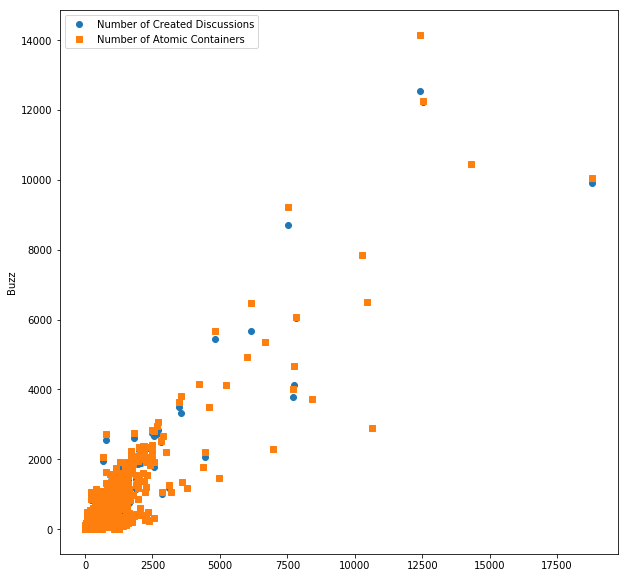

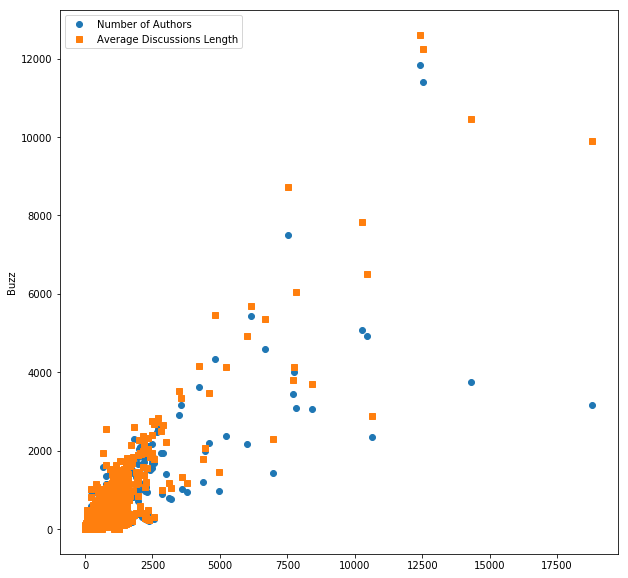

In [7]:
plt.figure(1,figsize=[10,10])
plt.plot(df10[77],df10[0],'o',label='Number of Created Discussions')
plt.plot(df10[77],df10[28],'s',label='Number of Atomic Containers')
plt.ylabel('Buzz')
plt.legend(loc=2)
plt.figure(2,figsize=[10,10])
plt.plot(df10[77],df10[56],'o',label='Number of Authors')
plt.plot(df10[77],df10[70],'s',label='Average Discussions Length')
plt.ylabel('Buzz')
plt.legend(loc=2)

### Scaling data using <font color = 'red'>StandardScaler</font> and splitting into train and test using<font color = 'red'> train_test_split </font>

In [8]:
X = df10.iloc[:,:77]
y = df10.iloc[:,77]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
import warnings
warnings.filterwarnings('ignore')
X_train_org, X_test_org, y_train, y_test = train_test_split(X,y,random_state=6)
sc = StandardScaler()
X_train = sc.fit_transform(X_train_org)
X_test = sc.transform(X_test_org)

In [11]:
from sklearn.model_selection import GridSearchCV

# <font color='red'>KNeighborsRegressor

In [12]:
from sklearn.neighbors import KNeighborsRegressor
param_grid = {'n_neighbors':range(1,10)}
grid_search = GridSearchCV(KNeighborsRegressor(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 10)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

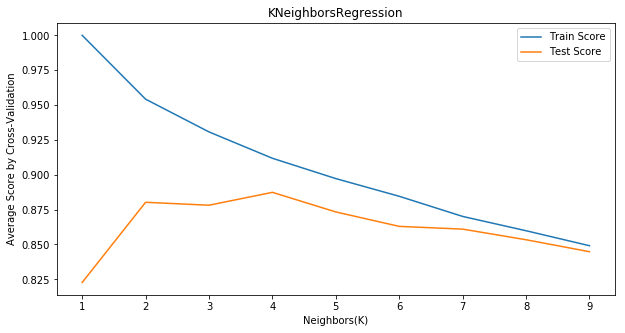

In [13]:
neighbors = [dict['n_neighbors'] for dict in grid_search.cv_results_['params']]
plt.figure(figsize=(10,5))
plt.plot(neighbors,grid_search.cv_results_['mean_train_score'],label='Train Score')
plt.plot(neighbors,grid_search.cv_results_['mean_test_score'],label='Test Score')
plt.xlabel('Neighbors(K)')
plt.ylabel('Average Score by Cross-Validation')
plt.title('KNeighborsRegression')
plt.legend()

In [14]:
knn_train_score = grid_search.score(X_train,y_train)
knn_test_score = grid_search.score(X_test,y_test)

In [15]:
knn_report= [['KNeighborsRegressor',grid_search.best_params_,knn_train_score,knn_test_score]]
titles=['Model','Parameters','Train Score','Test Score']
pd.DataFrame(knn_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,KNeighborsRegressor,{'n_neighbors': 4},0.915891,0.940183


# <font color='red'> LinearRegression

In [16]:
from sklearn.linear_model import LinearRegression
param_grid={'n_jobs':[-1]}
lreg = GridSearchCV(LinearRegression(),param_grid=param_grid,cv=5,return_train_score=True)
lreg.fit(X_train, y_train)
lreg_train_score = round(lreg.score(X_train, y_train),6)
lreg_test_score = round(lreg.score(X_test, y_test),6)

In [17]:
lreg_report = [['LinearRegression','',lreg_train_score,lreg_test_score]]
pd.DataFrame(lreg_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,LinearRegression,,0.970645,0.966473


# <font color='red'> SGDRegressor

In [18]:
from sklearn.linear_model import SGDRegressor

In [19]:
param_grid={'n_iter':[10,100,1000,10000],'learning_rate':['optimal'],'penalty':['l1','l2']}
grid_search = GridSearchCV(SGDRegressor(),param_grid,cv=5,return_train_score=True)
grid_search.fit(X_train,y_train)


GridSearchCV(cv=5, error_score='raise',
       estimator=SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', max_iter=None, n_iter=None, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_iter': [10, 100, 1000, 10000], 'learning_rate': ['optimal'], 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [20]:
sgd_train_score = grid_search.score(X_train,y_train)
sgd_test_score = grid_search.score(X_test,y_test)
param = grid_search.best_params_

In [21]:
sgd_report = [['SGDRegressor',param,sgd_train_score,sgd_test_score]]
pd.DataFrame(sgd_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,SGDRegressor,"{'learning_rate': 'optimal', 'n_iter': 10000, ...",-5.778456e+07,-7.223959e+07


# <font color='red'> Ridge

In [22]:
from sklearn.linear_model import Ridge

ridge_train_array = []
ridge_test_array = []

param_grid={'alpha':[0.01,0.1,1,10,100]}
ridge_grid_search = GridSearchCV(Ridge(),param_grid=param_grid,cv=5,return_train_score=True)
ridge_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [23]:
ridge_train_score = ridge_grid_search.score(X_train,y_train)
ridge_test_score = ridge_grid_search.score(X_test,y_test)
ridge_param = ridge_grid_search.best_params_

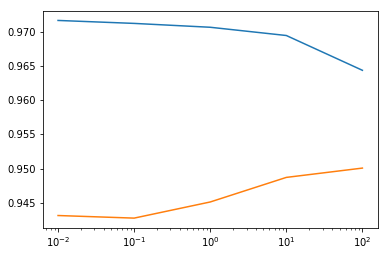

In [24]:
ridge_param_values = [dict['alpha'] for dict in ridge_grid_search.cv_results_['params']]
plt.plot(ridge_param_values,ridge_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')
plt.plot(ridge_param_values,ridge_grid_search.cv_results_['mean_test_score'])

In [25]:
ridge_report = [['Ridge',ridge_param,ridge_train_score,ridge_test_score]]
pd.DataFrame(ridge_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,Ridge,{'alpha': 100},0.964034,0.96677


# <font color='red'> Lasso

In [26]:
from sklearn.linear_model import Lasso
param_grid={'alpha':[0.01,0.1,1,10,100]}
lasso_grid_search = GridSearchCV(Lasso(),param_grid=param_grid,cv=5,return_train_score=True)
lasso_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [27]:
lasso_train_score = lasso_grid_search.score(X_train,y_train)
lasso_test_score = lasso_grid_search.score(X_test, y_test)
lasso_param = lasso_grid_search.best_params_

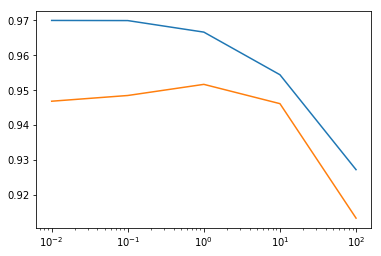

In [28]:
lasso_param_values = [dict['alpha'] for dict in lasso_grid_search.cv_results_['params']]
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_train_score'])
plt.xscale('log')
plt.plot(lasso_param_values,lasso_grid_search.cv_results_['mean_test_score'])

In [29]:
lasso_report = [['Lasso',lasso_param,lasso_train_score,lasso_test_score]]
pd.DataFrame(lasso_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,Lasso,{'alpha': 1},0.96543,0.965604


# <font color='red'> Polynomial Regression

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
pipe = Pipeline([('poly',PolynomialFeatures()),('lreg',LinearRegression())])

In [31]:
param_grid = {'poly__degree':[2]}
poly_grid_search = GridSearchCV(pipe,param_grid=param_grid,cv=5,return_train_score=True)
poly_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lreg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'poly__degree': [2]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [32]:
poly_train_score = poly_grid_search.score(X_train,y_train)
poly_test_score = poly_grid_search.score(X_test,y_test)
poly_param = poly_grid_search.best_params_

In [33]:
poly_report = [['Polynomial Regression',poly_param,poly_train_score,poly_test_score]]
pd.DataFrame(poly_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,Polynomial Regression,{'poly__degree': 2},0.999725,-3.155313e+12


# <font color='red'> LinearSVR

In [34]:
from sklearn.svm import LinearSVR
param_grid={'C':[0.01,0.1,1,10,100]}
lsvr_grid_search = GridSearchCV(LinearSVR(),param_grid=param_grid,cv=5,return_train_score=True)

In [35]:
lsvr_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring=None, verbose=0)

In [36]:
lsvr_train_score = lsvr_grid_search.score(X_train,y_train)
lsvr_test_score = lsvr_grid_search.score(X_test,y_test)
lsvr_param = lsvr_grid_search.best_params_

In [69]:
lsvr_report = [['Linear SVR',lsvr_param,lsvr_train_score,lsvr_test_score]]
pd.DataFrame(lsvr_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,Linear SVR,{'C': 100},0.9645,0.9666


# <font color='red'> RBF SVR

In [38]:
from sklearn.svm import SVR
param_grid = {'C':[0.01,0.1,1,10,100],'gamma':[0.01,0.1,1,10,100]}
rbfsvr_grid_search = GridSearchCV(SVR(kernel='rbf'),param_grid=param_grid,cv=5,return_train_score=True)
rbfsvr_grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.01, 0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [39]:
rbfsvr_train_score = rbfsvr_grid_search.score(X_train,y_train)
rbfsvr_test_score = rbfsvr_grid_search.score(X_test,y_test)
rbfsvr_param = rbfsvr_grid_search.best_params_

In [40]:
rbfsvr_report = [['RBF SVR',rbfsvr_param,rbfsvr_train_score,rbfsvr_test_score]]
pd.DataFrame(rbfsvr_report,columns=titles,index=[1])

,Model,Parameters,Train Score,Test Score
1,RBF SVR,"{'C': 100, 'gamma': 0.01}",0.321163,0.261887


# <font color='red'> Polynomial SVR
### Due to high time consumption in computation of this model, we decided to exclude it from our analysis

In [41]:
# from sklearn.svm import SVR
# param_grid = {'C':[0.01,0.1,1,10,100],'gamma':[0.01,0.1,1,10,100],'degree':[2]}
# polysvr_grid_search = GridSearchCV(SVR(kernel='poly'),param_grid=param_grid,cv=5,return_train_score=True)
# polysvr_grid_search.fit(X_train,y_train)

In [42]:
# polysvr_train_score = poly_grid_search.score(X_train,y_train)
# polysvr_test_score = poly_grid_search.score(X_test,y_test)
# polysvr_param = polysvr_grid_search.best_params_
# polysvr_report = [['Polynomial SVR',polysvr_param,polysvr_train_score,polysvr_test_score]]
# pd.DataFrame(polysvr_report,columns=titles,index=[1])

# <font color='red'> Final Report

In [70]:
pd.options.display.float_format = '{:.4f}'.format
final_report = pd.DataFrame(knn_report+lreg_report+sgd_report+ridge_report+lasso_report+poly_report+lsvr_report,columns=titles,index=range(1,8))
final_report = final_report.sort_values(by='Test Score',ascending=False)
final_report

,Model,Parameters,Train Score,Test Score
4,Ridge,{'alpha': 100},0.9640,0.9668
7,Linear SVR,{'C': 100},0.9645,0.9666
2,LinearRegression,,0.9706,0.9665
5,Lasso,{'alpha': 1},0.9654,0.9656
1,KNeighborsRegressor,{'n_neighbors': 4},0.9159,0.9402
3,SGDRegressor,"{'learning_rate': 'optimal', 'n_iter': 10000, ...",-57784563.4107,-72239593.4066
6,Polynomial Regression,{'poly__degree': 2},0.9997,-3155313154977.7153


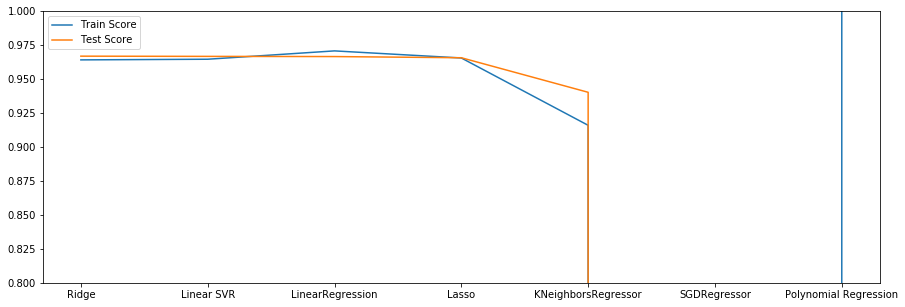

In [71]:
import numpy as np
plt.figure(figsize=(15,5))
plt.plot(final_report.iloc[:,0],final_report.iloc[:,2],label='Train Score')
plt.plot(final_report.iloc[:,0],final_report.iloc[:,3],label='Test Score')
plt.ylim(0.8,1)
plt.legend()

# <font color = 'red'> Ridge provides the best test score with alpha value of 100.
# <font color = 'red'> Running the model with full data using Ridge Regression.

In [62]:
Full_X = df.iloc[:,:77]
Full_y = df[77]

In [63]:
Full_X_train_org, Full_X_test_org, Full_y_train, Full_y_test = train_test_split(Full_X,Full_y,random_state=6)
sc = StandardScaler()
Full_X_train = sc.fit_transform(Full_X_train_org)
Full_X_test = sc.transform(Full_X_test_org)

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
final_ridge = Ridge(alpha=100)
kfold = KFold(n_splits=5)

In [67]:
cv_train_scores = cross_val_score(final_ridge, Full_X_train,Full_y_train, cv=kfold)
cv_test_scores = cross_val_score(final_ridge, Full_X_test,Full_y_test, cv=kfold)

In [68]:
print('Cross validation train score is : {0}\nCross validation test score is : {1}'.format(round(cv_train_scores.mean(),5), round(cv_test_scores.mean(),5)))

Cross validation train score is : 0.94133
Cross validation test score is : 0.90767
